# CNN

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

## 1. Import and Reshape Data

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
num_labels=len(np.unique(y_train))
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

shape1=x_train.shape[1]
shape2=x_train.shape[2]

#cnn 에 쓸 수 있도록 4D tensor 로 reshape 한다. 흑백 이미지.
x_train=x_train.reshape(-1, shape1,shape2,1).astype('float32')
x_test=x_test.reshape(-1, shape1,shape2,1).astype('float32')
x_train=x_train/255.
x_test=x_test/255.

#표본수를 포함하여 4D 텐서이므로 입력은 3D 텐서가 된다.
input_shape=(shape1,shape2,1) #흑백 사진 1장
batch_size=64 # batch size를 정해놓음
kernel_size=3
pool_size=2
filters=64
dropout=0.3

print(y_test.shape)

(10000, 10)


## 2. 모델 생성
### Sequential API

* Conv2d layer: 28X28 -> 26X26 
* max pooling layer: 26X26 -> 13X13
* Conv2d layer: #param: (3*3*64)+1 * 64 = 36928 개
* Flatten: 3*3*64 를 1D tensor로 바꿈. 일렬로 늘어놓음. 3*3*64 = 576
* 출력층 Dense: (576+1)*10개의 class = 5770

In [3]:
model=Sequential()
model.add(Conv2D(filters=filters,kernel_size=kernel_size,activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,kernel_size=kernel_size,activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,kernel_size=kernel_size,activation='relu'))
model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(num_labels, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dropout (Dropout)            (None, 576)               0

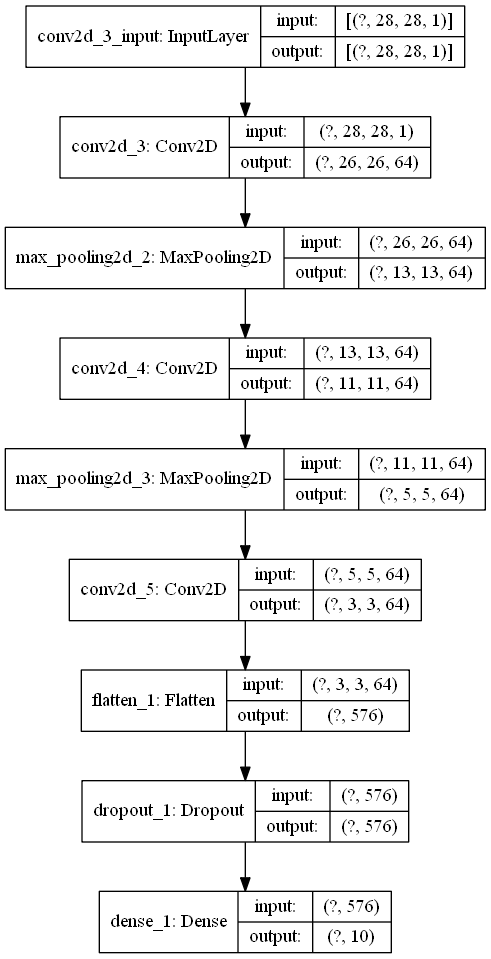

In [8]:
plot_model(model,show_shapes=True)

fit 을 할 때 iid가 되도록 random shuffling 이 일어남

In [4]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=64)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.2022 - accuracy: 0.9373
Epoch 2/10
60000/60000 [==============================] - 96s 2ms/sample - loss: 0.0597 - accuracy: 0.9816
Epoch 3/10
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.0457 - accuracy: 0.9860
Epoch 4/10
60000/60000 [==============================] - 98s 2ms/sample - loss: 0.0352 - accuracy: 0.9881
Epoch 5/10
60000/60000 [==============================] - 96s 2ms/sample - loss: 0.0292 - accuracy: 0.9906
Epoch 6/10
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.0265 - accuracy: 0.9914
Epoch 7/10
60000/60000 [==============================] - 96s 2ms/sample - loss: 0.0234 - accuracy: 0.9922
Epoch 8/10
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.0201 - accuracy: 0.9933
Epoch 9/10
60000/60000 [==============================] - 96s 2ms/sample - loss: 0.0172 - accuracy: 0.9942
Epoch 10/10
60

In [ ]:
results=model.evaluate(x_test,y_test, batch_size=128)
print(results)

### functional api 
* sequential api와 달리 맨 마지막에 객체화

In [1]:
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Model

x=Input(shape=input_shape)
h=Conv2D(filters=filters,kernel_size=kernel_size,activation='relu')(x)
h=MaxPooling2D()(h) #maxpooling2D의 default는 (2,2)임
h=Conv2D(filters=filters,kernel_size=kernel_size,activation='relu')(h)
h=MaxPooling2D()(h) #maxpooling2D의 default는 (2,2)임
h=Conv2D(filters=filters,kernel_size=kernel_size,activation='relu')(h)
h=Flatten()(h)
h=Dropout(dropout)(h)
out=Dense(num_labels,activation='softmax')(h)

model=Model(inputs=x,outputs=out) #여기서 객체화
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=64)
score=model.evaluate(x_test,y_test)
print(score)

KeyboardInterrupt: 